In [1]:
import tensorflow as tf
import tensorflow.contrib.eager as tfe
import numpy as np
tfd = tf.contrib.distributions
import matplotlib.pyplot as plt
import pandas as pd

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



### First we defined the functions to be used.

## Defining Encoder and Decoder

As stated in the exercise sheet, encoder consists of 2 hidden layers with size 256 and decoder consists of 2 hidden layers with size 256. 
As activation function, ReLU is used as stated in exercise sheet. 

In [2]:
def encoder(X_in):
    hidden1 = tf.layers.dense(X_in, hidden_dimension, activation)
    hidden2 = tf.layers.dense(hidden1, hidden_dimension, activation)
    mu = tf.layers.dense(hidden2, latent_dimension)
    L = tf.layers.dense(hidden2, latent_dimension, tf.nn.tanh)
    return mu, L

In [3]:
def sample_data(mu, L, batch_size):
    epsilon = tf.random.normal([batch_size,latent_dimension], 0, 1, dtype = 'float64')
    z = mu + L * epsilon
    return z

In [4]:
def decoder(sample_data):
    hidden1 = tf.layers.dense(sample_data, hidden_dimension, activation)
    hidden2 = tf.layers.dense(hidden1, hidden_dimension, activation)
    output = tf.layers.dense(hidden2, input_dimension, tf.nn.sigmoid)
    return output

## Loss Function

In order to implement the loss function, we divided the loss function into two, as reconstruction loss and KL Divergence loss as regularization loss.

In [5]:
def prior_z(latent_dimension):
    prior = tfd.MultivariateNormalDiag(np.zeros(latent_dimension), np.ones(latent_dimension))
    return prior

In [6]:
def posterior(mu, L):
    posterior_dist = tfd.MultivariateNormalDiag(mu, L)
    return posterior_dist

In [7]:
def likelihood(output_mean, sigma):
    likelihood_dist = tfd.MultivariateNormalDiag(output_mean, scale_identity_multiplier = sigma, scale_diag = None)
    
    return likelihood_dist

In [8]:
def kl_divergence(p,q):
    kl = tf.distributions.kl_divergence(p,q)
    return kl 

In [9]:
def reconstruction_loss(input_data, output_mean):
    loss = tf.math.squared_difference(input_data, output_mean)
    loss = tf.reduce_sum(loss)
    loss = loss / 2
    return loss

## Creating Batch

In [10]:
def create_batch(train_x):
    batches = []
    batches_y = []
    index_list = np.arange(train_x.shape[0])
    np.random.shuffle(index_list)
    
    for i in range(0, 468):
        loc = i * batch_size
        batch_indices = index_list[loc:loc+batch_size]
        batch = train_x[batch_indices]
        batch_y = train_y[batch_indices]
        batches.append(batch)
        batches_y.append(batch_y)
    return batches, batches_y

In [11]:
def create_batch_test(test_x):
    batches = []
    batches_y = []
    index_list = np.arange(test_x.shape[0])
    np.random.shuffle(index_list)
    
    for i in range(0, 78):
        loc = i * batch_size
        batch_indices = index_list[loc:loc+batch_size]
        batch_x = test_x[batch_indices]
        batch_y = test_y[batch_indices]
        batches.append(batch_x)
        batches_y.append(batch_y)
    
    return batches[0], batches_y[0]

## Visualization Methods

In [12]:
def print_loss(loss_history):
    for i in range(0, len(loss_history)):
        plt.scatter(i,loss_history[i])
    plt.show()

In [13]:
def visualize_latent_space(z,yval, e):
    plt.scatter(z[:,0], z[:,1], cmap = plt.cm.rainbow, c = yval)
    plt.colorbar()
    plt.title("Epoch: "+str(e))
    plt.show()

In [14]:
def print_comparison_test(data, o):
    for i in range(0,15):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2,4))
        ax1.set_title('original')
        ax1.imshow(np.reshape(data[i], [28, 28]), cmap='gray')
        o1 = o[i].reshape(28,28)
        ax2.set_title('decoded')
        ax2.imshow(o1, cmap='gray')
        plt.show()

In [15]:
def visualize_generated(imgs, e):
    images = []
    for i in range(len(imgs)):
        images.append(np.reshape(imgs[i], [28,28]))
    i = 0
    fig, ax = plt.subplots(1,15, figsize=(15,25))
    for img in images:
        if(i<15):
            ax[i].imshow(img, cmap='gray')
        i = i + 1
    plt.title("Epoch: "+str(e))
    plt.show()

## Defining parameters

In [16]:
# defining parameters
activation = tf.nn.relu 
real_dimension = 28
hidden_dimension = 256
latent_dimension = 2
input_dimension = 784
learning_rate = 0.001
epoch = 51
batch_size = 128

X_in = tf.placeholder(dtype=tf.float64, shape=[None, input_dimension], name='X')
sigma = tf.Variable(tf.random_uniform(shape = [],dtype=tf.float64), shape = [], dtype=tf.float64,trainable = True)

## Defining model & loss

In [17]:
# Define the model.
encoder_mu_L = encoder(X_in)
posterior_dist = posterior(encoder_mu_L[0], encoder_mu_L[1])
prior = prior_z(latent_dimension)

generated = prior.sample(15)
# create z
sample = sample_data(encoder_mu_L[0], encoder_mu_L[1], batch_size)

output_mean = decoder(sample)

# Defining the losses
kl_div = kl_divergence(posterior_dist, prior)
likelihood_dist = likelihood(output_mean, sigma)

reconst_loss = likelihood_dist.log_prob(X_in)
loss = tf.reduce_mean(reconst_loss - kl_div)

#define optimizer
optimize = tf.train.AdamOptimizer(learning_rate).minimize(-loss)

Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.contrib.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.contrib.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). Y

## Loading Data
Now that we have defined the functions, we can load the data.

In [18]:
data = tf.keras.datasets.mnist.load_data()

In [19]:
train, test = data
train_x = train[0]
train_y = train[1]
test_x = test[0]
test_y = test[1]

## Data Preprocessing

As data preprocessing we flattened the each training data and the new shape of the data is converted from 28x28 to 1x(28*28)
Then, we normalized the data by dividing into 255, since the pixel range is between 0-255.

In [20]:
train_x = train_x.reshape(-1, 28*28)
train_x = train_x / 255

test_x = test_x.reshape(-1, 28*28) 
test_x = test_x / 255

## Training & Reconstructing from test data

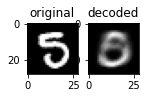

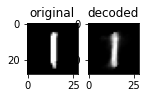

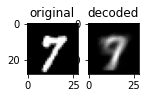

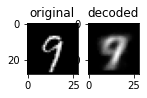

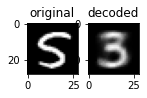

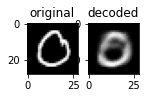

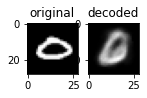

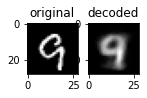

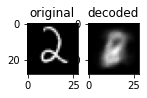

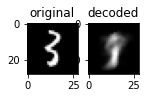

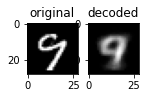

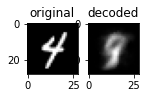

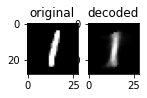

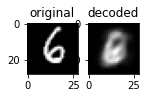

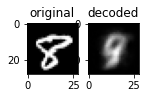

[TEST] Epoch:  1 , Loss:    38.28275759401403 Reconstruction loss:    51.66088819437354 KL Divergence:    13.378130600359516


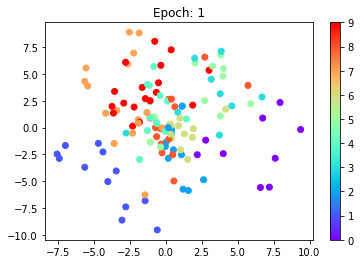

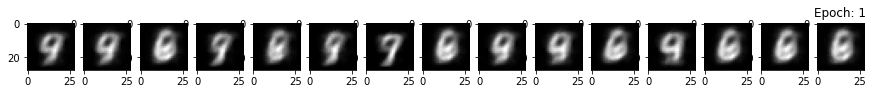

[TRAIN] Epoch:  1 ,Batch:  0 Training Loss:    52.26177675986505 Reconstruction loss:    65.06354355289193 KL Divergence:    12.801766793026879
[TRAIN] Epoch:  1 ,Batch:  100 Training Loss:    48.58205936064228 Reconstruction loss:    58.046472418283926 KL Divergence:    9.464413057641643
[TRAIN] Epoch:  1 ,Batch:  200 Training Loss:    54.135505378902685 Reconstruction loss:    65.88240223117674 KL Divergence:    11.746896852274045
[TRAIN] Epoch:  1 ,Batch:  300 Training Loss:    56.71986389703641 Reconstruction loss:    69.22500126143863 KL Divergence:    12.505137364402229
[TRAIN] Epoch:  1 ,Batch:  400 Training Loss:    65.75377700924842 Reconstruction loss:    75.35251078276221 KL Divergence:    9.598733773513786


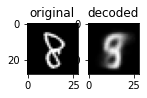

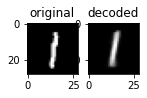

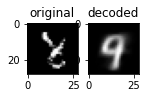

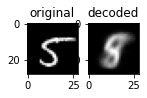

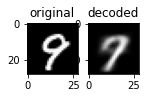

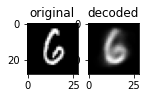

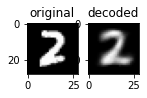

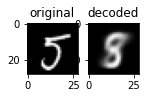

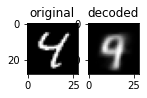

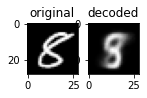

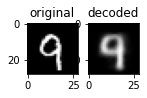

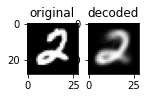

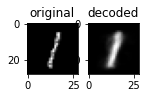

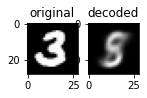

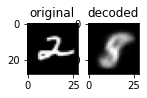

[TEST] Epoch:  5 , Loss:    116.204787994998 Reconstruction loss:    129.52900102963733 KL Divergence:    13.324213034639337


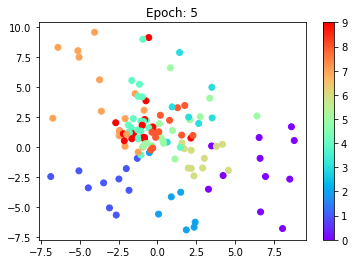

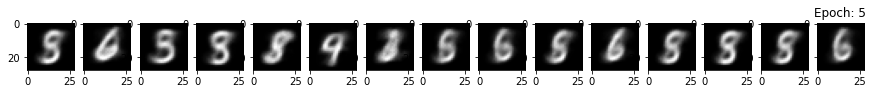

[TRAIN] Epoch:  5 ,Batch:  0 Training Loss:    117.35466667869537 Reconstruction loss:    130.948796772261 KL Divergence:    13.594130093565674
[TRAIN] Epoch:  5 ,Batch:  100 Training Loss:    132.71663042152502 Reconstruction loss:    144.81042399418357 KL Divergence:    12.093793572658551
[TRAIN] Epoch:  5 ,Batch:  200 Training Loss:    132.35355560197664 Reconstruction loss:    144.8695912900376 KL Divergence:    12.516035688060922
[TRAIN] Epoch:  5 ,Batch:  300 Training Loss:    120.8435776057758 Reconstruction loss:    131.70923751757954 KL Divergence:    10.865659911803771
[TRAIN] Epoch:  5 ,Batch:  400 Training Loss:    114.10140638393972 Reconstruction loss:    125.8378544439091 KL Divergence:    11.736448059969383


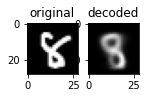

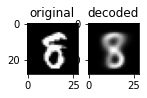

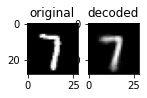

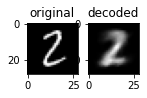

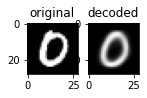

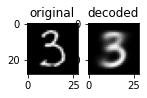

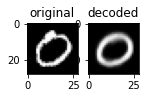

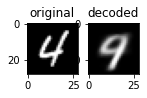

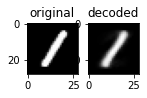

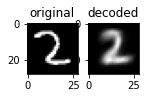

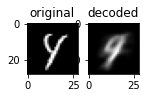

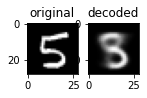

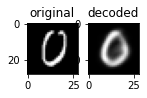

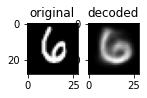

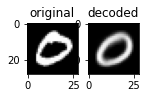

[TEST] Epoch:  25 , Loss:    127.5199687452729 Reconstruction loss:    139.73073202718007 KL Divergence:    12.210763281907173


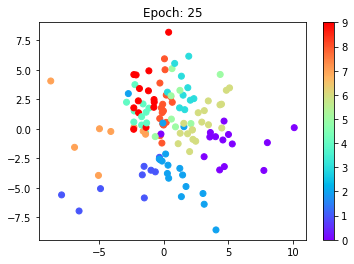

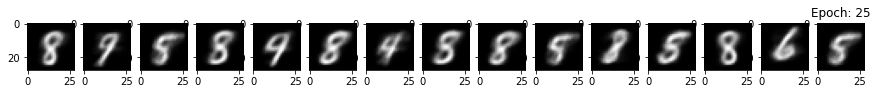

[TRAIN] Epoch:  25 ,Batch:  0 Training Loss:    131.6155398422028 Reconstruction loss:    145.16650365432332 KL Divergence:    13.550963812120541
[TRAIN] Epoch:  25 ,Batch:  100 Training Loss:    168.03735084145646 Reconstruction loss:    182.51606637134253 KL Divergence:    14.478715529886053
[TRAIN] Epoch:  25 ,Batch:  200 Training Loss:    156.61984382992722 Reconstruction loss:    170.10358338532922 KL Divergence:    13.483739555402025
[TRAIN] Epoch:  25 ,Batch:  300 Training Loss:    172.32749243653814 Reconstruction loss:    185.83050589336113 KL Divergence:    13.503013456823043
[TRAIN] Epoch:  25 ,Batch:  400 Training Loss:    161.7125751844693 Reconstruction loss:    174.27206708361774 KL Divergence:    12.559491899148421


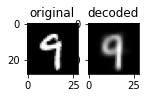

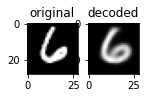

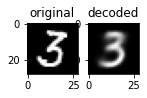

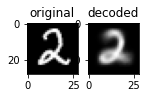

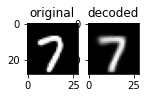

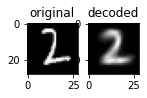

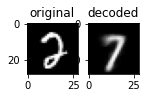

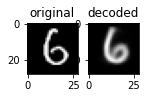

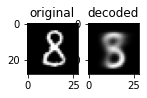

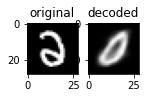

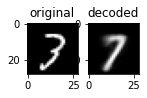

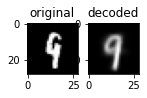

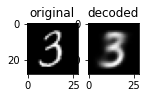

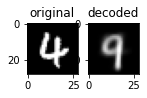

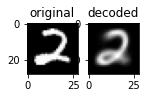

[TEST] Epoch:  50 , Loss:    181.55315250801416 Reconstruction loss:    194.41052417679725 KL Divergence:    12.857371668783106


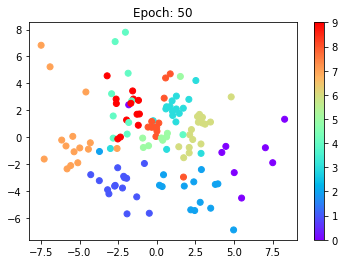

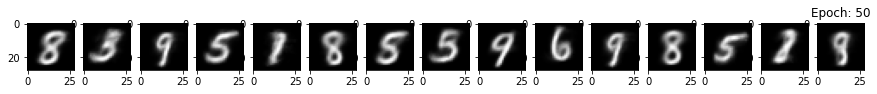

[TRAIN] Epoch:  50 ,Batch:  0 Training Loss:    169.49329830092216 Reconstruction loss:    184.07401106836596 KL Divergence:    14.580712767443789
[TRAIN] Epoch:  50 ,Batch:  100 Training Loss:    186.15368320383038 Reconstruction loss:    200.25477034861467 KL Divergence:    14.101087144784323
[TRAIN] Epoch:  50 ,Batch:  200 Training Loss:    162.64913326078477 Reconstruction loss:    176.65799254099332 KL Divergence:    14.008859280208533
[TRAIN] Epoch:  50 ,Batch:  300 Training Loss:    184.14118916963184 Reconstruction loss:    198.10400018067728 KL Divergence:    13.962811011045478
[TRAIN] Epoch:  50 ,Batch:  400 Training Loss:    150.57378586482713 Reconstruction loss:    164.74522179370112 KL Divergence:    14.171435928873994


In [21]:
loss_history = []
elbo_hist = []
print_epochs = [1,5,25,50]

sess = tf.Session()
sess.run(tf.global_variables_initializer())
for e in range(0, epoch):
    # testing
    test_dataset, test_dataset_y = create_batch_test(test_x)
    feed = {X_in: test_dataset}
    elbo, out, rec, kl, samp, g = sess.run([loss, output_mean, reconst_loss, kl_div, sample, generated], feed)
    elbo_hist.append(-elbo)
    if e in print_epochs: 
        print_comparison_test(test_dataset, out)
        print('[TEST]','Epoch: ', e, ', Loss:   ', np.mean(elbo), 'Reconstruction loss:   ', np.mean(rec), 'KL Divergence:   ', np.mean(kl))
        y_vals_test = test_dataset_y
        visualize_latent_space(samp, y_vals_test, e)
        randoms = []
        for _ in range(batch_size):
            random = np.random.normal(0, 1, latent_dimension)
            randoms.append(random)
        imgs = sess.run(output_mean, feed_dict = {sample: randoms})
        visualize_generated(imgs, e)
    # training
    train_dataset, train_dataset_y = create_batch(train_x)
    i = 0
    for batch in train_dataset:
        sess.run(optimize, feed_dict = {X_in: batch})
        l, o, r, k, s = sess.run([loss, output_mean, reconst_loss, kl_div, sample], feed_dict = {X_in: batch})   
        loss_history.append(-l)
        if e in print_epochs: 
            if (i % 100) == 0:
                print('[TRAIN]', 'Epoch: ', e, ',Batch: ', i, 'Training Loss:   ', np.mean(l), 'Reconstruction loss:   ', np.mean(r), 'KL Divergence:   ', np.mean(k))
        i = i + 1


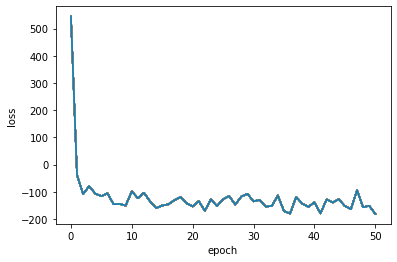

In [22]:
# Plotting the loss
for i in range(0, len(elbo_hist)):
    plt.plot(elbo_hist)
    plt.xlabel("epoch")
    plt.ylabel("loss")
plt.show()

## 32 dimensional space

In [24]:
latent_dimension = 32
# Define the model.
encoder_mu_L = encoder(X_in)
posterior_dist = posterior(encoder_mu_L[0], encoder_mu_L[1])
prior = prior_z(latent_dimension)

generated = prior.sample(15)
# create z
sample = sample_data(encoder_mu_L[0], encoder_mu_L[1], batch_size)

output_mean = decoder(sample)

# Defining the losses
kl_div = kl_divergence(posterior_dist, prior)
likelihood_dist = likelihood(output_mean, sigma)

reconst_loss = likelihood_dist.log_prob(X_in)
loss = tf.reduce_mean(reconst_loss - kl_div)

#define optimizer
optimize = tf.train.AdamOptimizer(learning_rate).minimize(-loss)

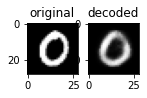

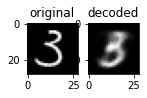

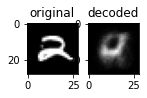

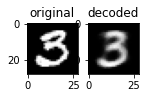

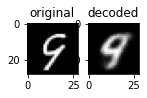

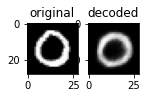

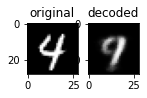

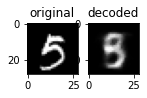

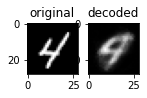

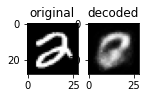

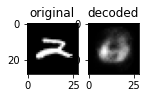

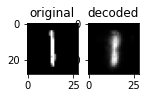

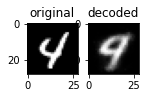

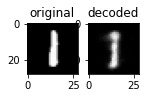

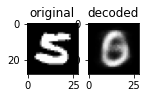

[TEST] Epoch:  1 , Loss:    -196.42474132250544 Reconstruction loss:    -184.03033899047017 KL Divergence:    12.394402332035273


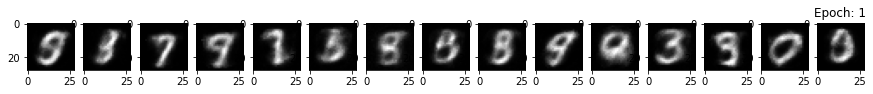

[TRAIN] Epoch:  1 ,Batch:  0 Training Loss:    -193.17667043523093 Reconstruction loss:    -180.88599960122852 KL Divergence:    12.29067083400244
[TRAIN] Epoch:  1 ,Batch:  100 Training Loss:    10.21827338355534 Reconstruction loss:    30.423424725194987 KL Divergence:    20.205151341639645
[TRAIN] Epoch:  1 ,Batch:  200 Training Loss:    229.25382295305434 Reconstruction loss:    268.4709947171233 KL Divergence:    39.217171764068965
[TRAIN] Epoch:  1 ,Batch:  300 Training Loss:    220.73472147504953 Reconstruction loss:    276.4540396592182 KL Divergence:    55.719318184168664
[TRAIN] Epoch:  1 ,Batch:  400 Training Loss:    291.4512951390956 Reconstruction loss:    354.8817945953448 KL Divergence:    63.43049945624922


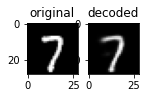

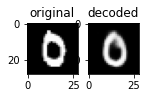

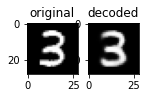

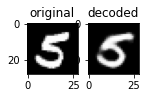

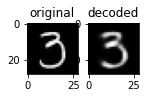

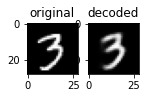

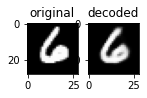

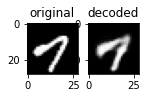

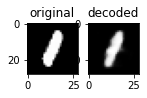

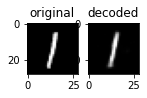

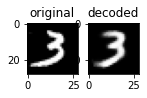

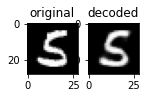

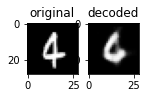

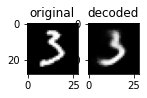

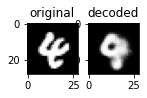

[TEST] Epoch:  5 , Loss:    408.6118441780052 Reconstruction loss:    509.70910624417263 KL Divergence:    101.09726206616753


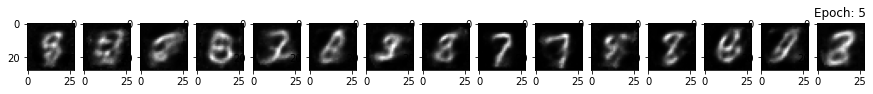

[TRAIN] Epoch:  5 ,Batch:  0 Training Loss:    419.34824256435485 Reconstruction loss:    516.2544616321122 KL Divergence:    96.90621906775738
[TRAIN] Epoch:  5 ,Batch:  100 Training Loss:    429.6424419250276 Reconstruction loss:    526.6075074738167 KL Divergence:    96.96506554878908
[TRAIN] Epoch:  5 ,Batch:  200 Training Loss:    429.54964388158123 Reconstruction loss:    531.7708430343988 KL Divergence:    102.22119915281753
[TRAIN] Epoch:  5 ,Batch:  300 Training Loss:    382.85763731962516 Reconstruction loss:    485.17916866804285 KL Divergence:    102.32153134841768
[TRAIN] Epoch:  5 ,Batch:  400 Training Loss:    435.5627597640023 Reconstruction loss:    542.3014580163239 KL Divergence:    106.73869825232165


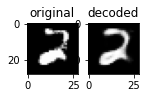

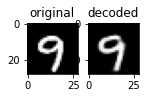

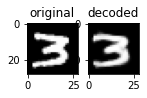

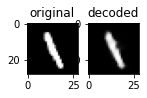

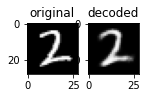

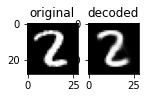

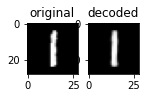

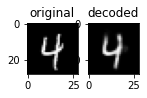

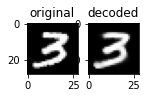

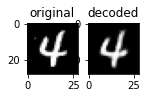

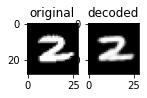

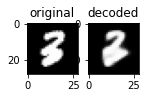

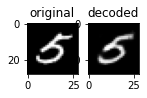

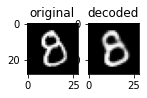

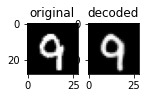

[TEST] Epoch:  25 , Loss:    517.188491677569 Reconstruction loss:    657.7460478879609 KL Divergence:    140.5575562103919


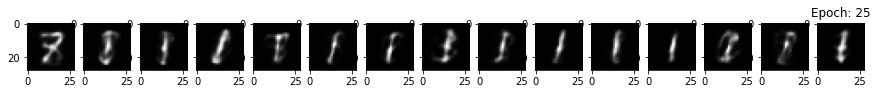

[TRAIN] Epoch:  25 ,Batch:  0 Training Loss:    549.4775871940585 Reconstruction loss:    682.8438469676026 KL Divergence:    133.3662597735441
[TRAIN] Epoch:  25 ,Batch:  100 Training Loss:    523.5172755053925 Reconstruction loss:    664.9156206063462 KL Divergence:    141.39834510095386
[TRAIN] Epoch:  25 ,Batch:  200 Training Loss:    507.89562092344136 Reconstruction loss:    646.8442405992795 KL Divergence:    138.9486196758382
[TRAIN] Epoch:  25 ,Batch:  300 Training Loss:    549.2962569702937 Reconstruction loss:    682.5864187847158 KL Divergence:    133.29016181442205
[TRAIN] Epoch:  25 ,Batch:  400 Training Loss:    546.000519999624 Reconstruction loss:    679.9243501410496 KL Divergence:    133.92383014142564


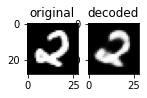

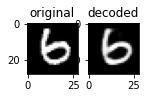

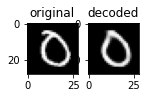

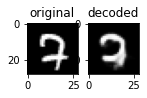

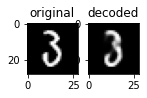

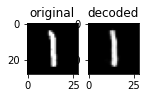

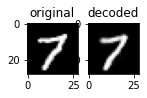

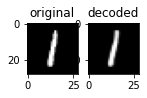

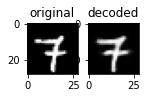

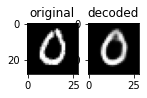

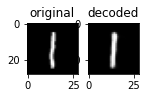

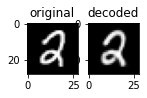

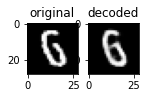

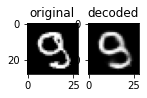

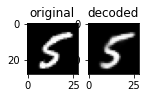

[TEST] Epoch:  50 , Loss:    524.570966679013 Reconstruction loss:    671.6176432426432 KL Divergence:    147.04667656363017


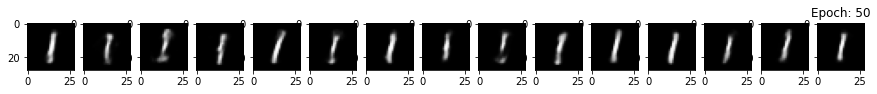

[TRAIN] Epoch:  50 ,Batch:  0 Training Loss:    586.7694986615576 Reconstruction loss:    731.4158007994761 KL Divergence:    144.64630213791838
[TRAIN] Epoch:  50 ,Batch:  100 Training Loss:    584.3177492199543 Reconstruction loss:    728.5038686639894 KL Divergence:    144.18611944403494
[TRAIN] Epoch:  50 ,Batch:  200 Training Loss:    580.6265296279666 Reconstruction loss:    723.5970518530929 KL Divergence:    142.97052222512622
[TRAIN] Epoch:  50 ,Batch:  300 Training Loss:    577.3426085913404 Reconstruction loss:    719.5008016661282 KL Divergence:    142.15819307478773
[TRAIN] Epoch:  50 ,Batch:  400 Training Loss:    553.8920126515924 Reconstruction loss:    699.6827815895192 KL Divergence:    145.79076893792677


In [25]:
loss_history = []
elbo_hist = []
print_epochs = [1,5,25,50]

sess = tf.Session()
sess.run(tf.global_variables_initializer())
for e in range(0, epoch):
    # testing
    test_dataset, test_dataset_y = create_batch_test(test_x)
    feed = {X_in: test_dataset}
    elbo, out, rec, kl, samp, g = sess.run([loss, output_mean, reconst_loss, kl_div, sample, generated], feed)
    elbo_hist.append(-elbo)
    if e in print_epochs: 
        print_comparison_test(test_dataset, out)
        print('[TEST]','Epoch: ', e, ', Loss:   ', np.mean(elbo), 'Reconstruction loss:   ', np.mean(rec), 'KL Divergence:   ', np.mean(kl))
        randoms = []
        for _ in range(batch_size):
            random = np.random.normal(0, 1, latent_dimension)
            randoms.append(random)
        imgs = sess.run(output_mean, feed_dict = {sample: randoms})
        visualize_generated(imgs, e)
    # training
    train_dataset, train_dataset_y = create_batch(train_x)
    i = 0
    for batch in train_dataset:
        sess.run(optimize, feed_dict = {X_in: batch})
        l, o, r, k, s = sess.run([loss, output_mean, reconst_loss, kl_div, sample], feed_dict = {X_in: batch})   
        loss_history.append(-l)
        if e in print_epochs: 
            if (i % 100) == 0:
                print('[TRAIN]', 'Epoch: ', e, ',Batch: ', i, 'Training Loss:   ', np.mean(l), 'Reconstruction loss:   ', np.mean(r), 'KL Divergence:   ', np.mean(k))
        i = i + 1

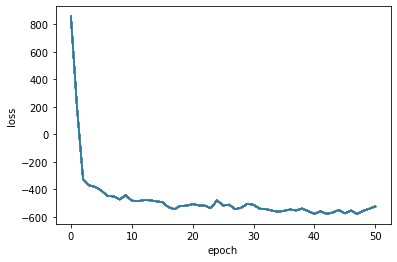

In [26]:
# Plotting the loss
for i in range(0, len(elbo_hist)):
    plt.plot(elbo_hist)
    plt.xlabel("epoch")
    plt.ylabel("loss")
plt.show()